In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [164]:
df = pd.read_csv("AQI_final.csv")

In [166]:
df.head(10)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2019-05-15,37.55,122.41,15.08,85.12,58.72,19.441039,15.08,163.01,48.23,16.44,85.54,14.19,281.0,Poor
1,Ahmedabad,2019-05-16,33.97,116.32,14.67,79.71,55.61,19.441039,14.67,91.26,51.86,15.55,83.89,13.15,330.0,Very Poor
2,Ahmedabad,2019-05-17,35.48,130.07,18.02,77.61,58.41,19.441039,18.02,98.35,38.99,15.88,83.83,13.34,356.0,Very Poor
3,Ahmedabad,2019-05-18,34.11,138.31,13.27,75.23,51.83,19.441039,13.27,88.66,42.22,15.93,82.73,13.44,359.0,Very Poor
4,Ahmedabad,2019-05-21,24.60,103.88,11.03,81.24,52.21,19.441039,11.03,80.74,46.65,15.31,82.95,11.66,321.0,Very Poor
5,Ahmedabad,2019-05-22,27.93,103.30,11.44,76.75,50.49,19.441039,11.44,86.48,54.34,15.60,84.17,13.60,270.0,Poor
6,Ahmedabad,2019-05-23,41.39,135.65,14.29,89.10,59.76,19.441039,14.29,105.96,49.70,16.33,83.95,13.48,323.0,Very Poor
7,Ahmedabad,2019-05-24,46.79,148.00,14.31,93.27,61.82,19.441039,14.31,131.04,56.31,15.21,82.40,11.95,344.0,Very Poor
8,Ahmedabad,2019-05-25,51.63,156.97,17.96,89.18,63.98,19.441039,17.96,134.22,49.62,15.72,83.20,13.93,404.0,Severe
9,Ahmedabad,2019-05-27,57.47,163.36,21.39,112.68,79.36,19.441039,21.39,143.30,52.19,16.47,84.11,13.58,435.0,Severe


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6951 entries, 0 to 6950
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        6951 non-null   object 
 1   Date        6951 non-null   object 
 2   PM2.5       6951 non-null   float64
 3   PM10        6951 non-null   float64
 4   NO          6951 non-null   float64
 5   NO2         6951 non-null   float64
 6   NOx         6951 non-null   float64
 7   NH3         6951 non-null   float64
 8   CO          6951 non-null   float64
 9   SO2         6951 non-null   float64
 10  O3          6951 non-null   float64
 11  Benzene     6951 non-null   float64
 12  Toluene     6951 non-null   float64
 13  Xylene      6951 non-null   float64
 14  AQI         6951 non-null   float64
 15  AQI_Bucket  6951 non-null   object 
dtypes: float64(13), object(3)
memory usage: 869.0+ KB


In [170]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,6951.000000,6951.000000,6951.000000,6951.000000,6951.000000,6951.000000,6951.000000,6951.000000,6951.000000,6951.000000,6951.000000,6951.000000,6951.000000
mean,55.696690,114.354914,15.944917,31.220847,31.444286,19.595780,1.366051,12.984690,35.613314,3.673218,10.511325,2.850434,137.947202
std,41.399612,69.792905,17.948494,21.489510,25.570405,14.976821,3.157228,14.645473,19.371130,5.038121,13.553700,5.282095,88.289752
min,2.000000,7.800000,0.060000,0.060000,0.000000,0.010000,0.000000,0.710000,1.310000,0.000000,0.000000,0.000000,20.000000
25%,27.800000,65.745000,5.080000,15.110000,14.270000,10.260000,0.490000,6.350000,22.105000,0.930000,2.040000,0.320000,79.000000
50%,45.660000,100.290000,10.080000,27.170462,24.290000,14.620000,0.740000,9.900000,32.630000,2.390000,5.980000,1.320000,110.000000
75%,69.285000,141.970000,18.670000,42.205000,38.815000,25.670000,1.100000,14.420000,44.660000,4.590000,13.120000,3.260000,162.000000
max,525.090000,390.100000,159.220000,277.310000,224.090000,166.700000,36.560000,186.080000,162.430000,64.440000,256.090000,137.450000,497.000000


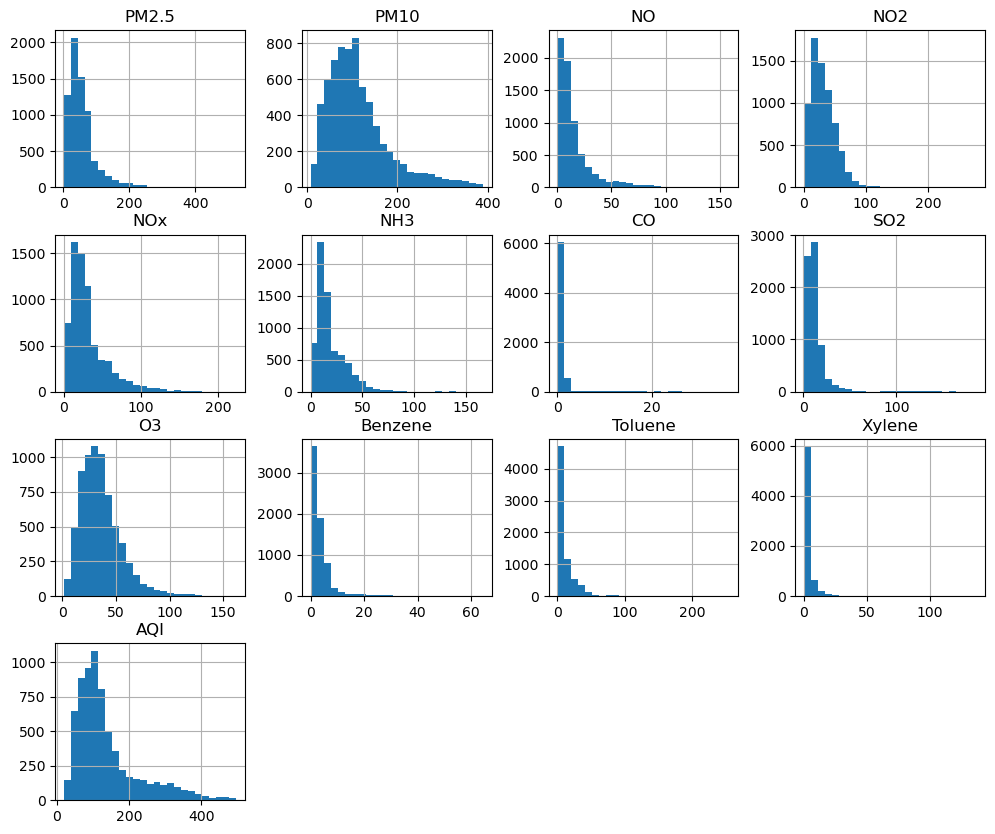

In [172]:
df.hist(figsize = (12,10), bins = 25)
plt.show()

### Handle missing values¶

In [175]:
if df.isnull().sum().any():
    df.fillna(data.median(), inplace=True)  # Replace missing values with the median
#city_column = df["City"]
# Drop irrelevant columns
#data_processed = df.drop(columns=["City", "Date", "AQI_Bucket"])

### Data Splitting

In [178]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# Split into features and target
features = data_processed.drop(columns=["AQI"])  # All columns except AQI
target = data_processed["AQI"]  # AQI is the target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Display shapes of train-test sets
print(f"Training Features: {X_train.shape}, Testing Features: {X_test.shape}")

# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)

rf_model.fit(X_train, y_train)

Training Features: (4865, 12), Testing Features: (2086, 12)


RandomForestRegressor(random_state=42)

### Perform Cross-Validation 

In [180]:
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# KFold Cross-Validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

cv_r2 = cross_val_score(rf_model, features, target, cv=kf, scoring='r2')
cv_mae = cross_val_score(rf_model, features, target, cv=kf, scoring='neg_mean_absolute_error')
cv_rmse = cross_val_score(rf_model, features, target, cv=kf, scoring='neg_root_mean_squared_error')

In [183]:
cv_predictions = cross_val_predict(rf_model, features, target, cv=kf)

In [123]:
cv_r2_score = r2_score(target, cv_predictions)
cv_mae_score = mean_absolute_error(target, cv_predictions)
cv_rmse_score = np.sqrt(mean_squared_error(target, cv_predictions))

# Print cross-validation results
print(f"Cross-validation R²: {cv_r2_score:.4f}")
print(f"Cross-validation MAE: {cv_mae_score:.2f}")
print(f"Cross-validation RMSE: {cv_rmse_score:.2f}")

Cross-validation R²: 0.9340
Cross-validation MAE: 14.35
Cross-validation RMSE: 22.68


In [185]:
from sklearn.metrics import mean_absolute_percentage_error

final_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
final_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_test = final_model.predict(X_test)

# Calculate evaluation metrics
r2 = r2_score(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
mape = mean_absolute_percentage_error(y_test, y_pred_test)

# Print results
print(f"R²: {r2:.4f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print("Mean Absolute Percentage Error","%.4f"%  (MAPE))

R²: 0.9371
MAE: 15.09
RMSE: 22.91
Mean Absolute Percentage Error 0.1208


In [187]:
data = {'Actual': y_test, 'Predicted': y_pred_test}
df = pd.DataFrame(data)

# Display the DataFrame
print(df)

      Actual   Predicted
6024   159.0  119.827420
4366   124.0  117.666153
4587    73.0   72.370220
3946   215.0  266.139687
5981   166.0  177.360284
...      ...         ...
978    176.0  178.604821
3011    83.0   89.449269
6487   122.0  135.844261
2515   350.0  325.249767
848     51.0   74.368844

[2086 rows x 2 columns]


### Feature Importance Plot

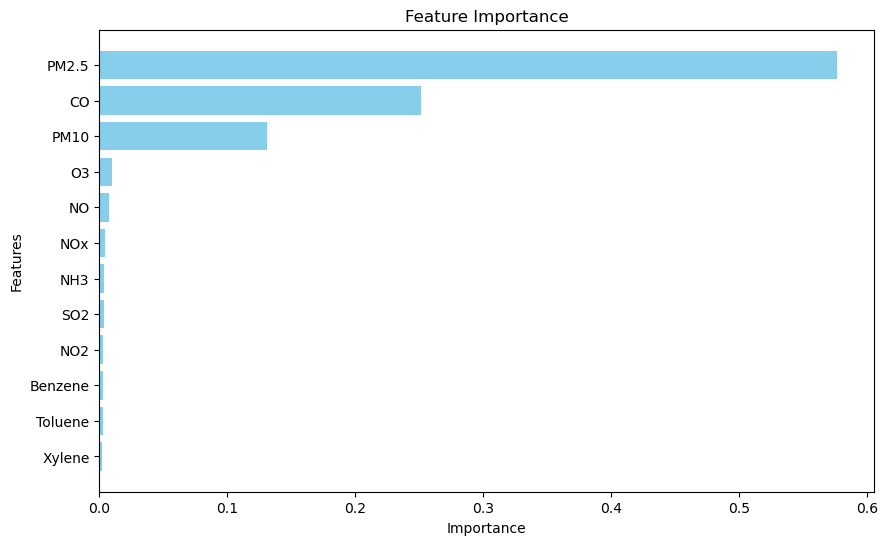

In [190]:
feature_importance = final_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': features.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Features")
plt.show()

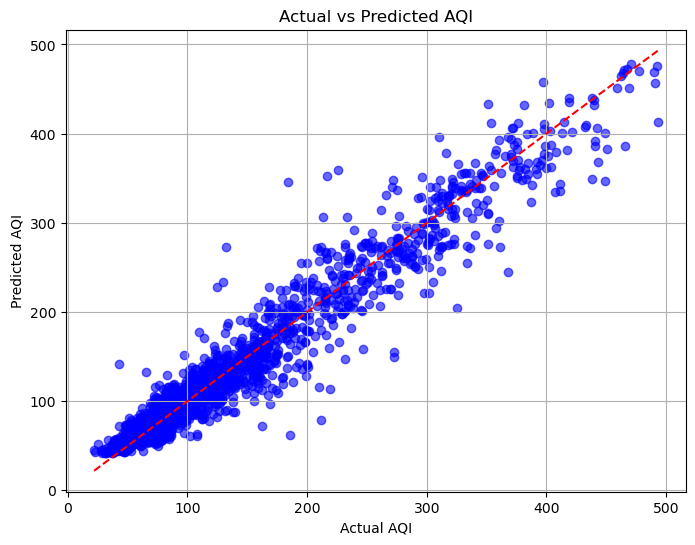

In [134]:
import matplotlib.pyplot as plt

# Plot Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, color='blue', alpha=0.6)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # 45-degree line
plt.title("Actual vs Predicted AQI")
plt.xlabel("Actual AQI")
plt.ylabel("Predicted AQI")
plt.grid(True)
plt.show()

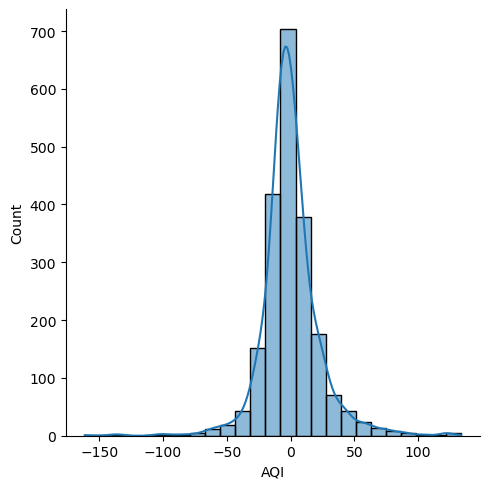

In [136]:
residuals = y_test - y_pred_test

sns.displot(residuals, bins=25, kde=True)

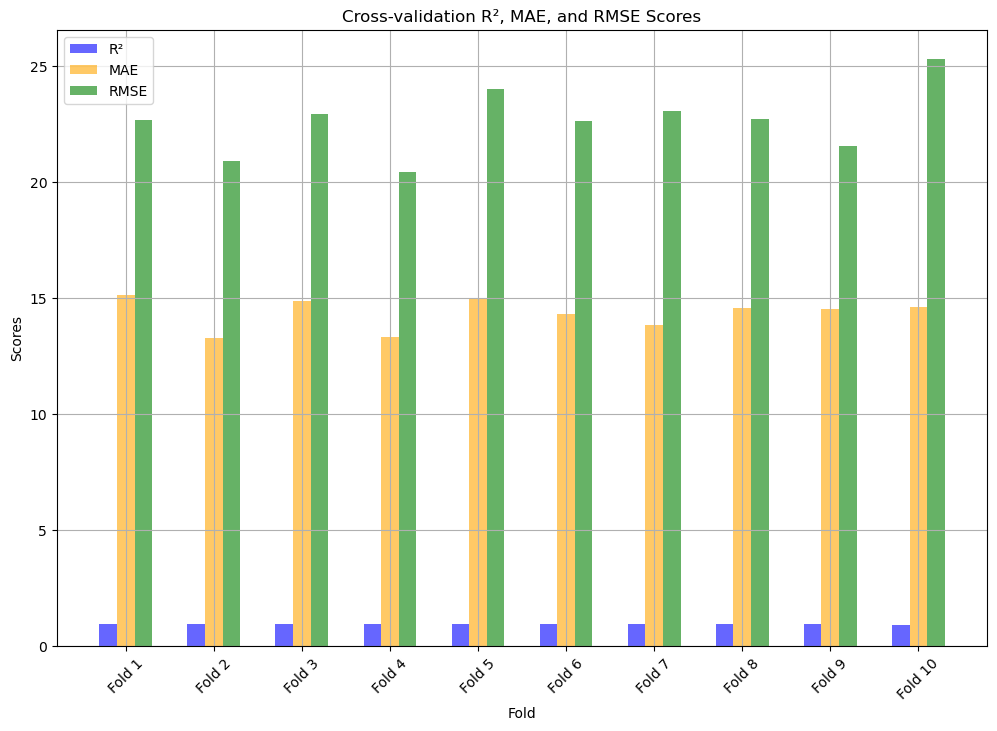

In [138]:
import numpy as np

# Combine the R², MAE, and RMSE scores into a single plot
x = np.arange(len(cv_r2))  # Number of folds

# Set up the figure
plt.figure(figsize=(12, 8))

# Plotting R²
plt.bar(x - 0.2, cv_r2, width=0.2, label="R²", color='blue', alpha=0.6)

# Plotting MAE
plt.bar(x, -cv_mae, width=0.2, label="MAE", color='orange', alpha=0.6)  # Negating MAE to make it positive

# Plotting RMSE
plt.bar(x + 0.2, -cv_rmse, width=0.2, label="RMSE", color='green', alpha=0.6)  # Negating RMSE to make it positive

# Adding labels and title
plt.title("Cross-validation R², MAE, and RMSE Scores")
plt.xlabel("Fold")
plt.ylabel("Scores")
plt.xticks(x, [f"Fold {i+1}" for i in range(len(cv_r2))], rotation=45)
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

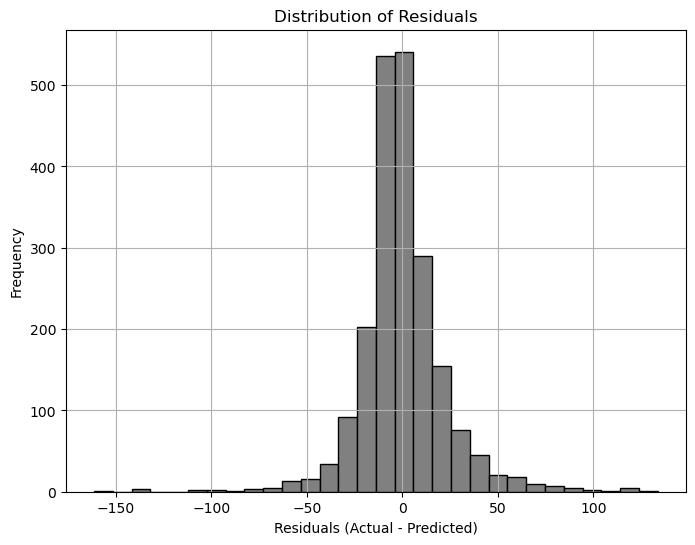

In [140]:
# Plotting the distribution of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=30, color='gray', edgecolor='black')
plt.title("Distribution of Residuals")
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

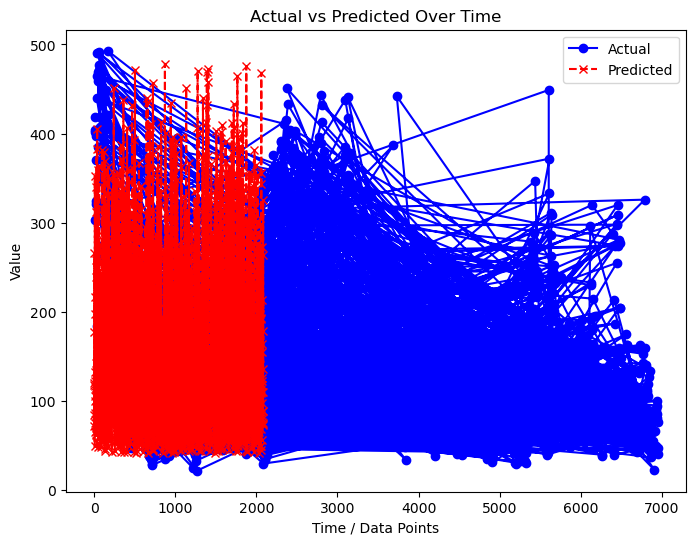

In [142]:
plt.figure(figsize=(8, 6))
plt.plot(y_test, label='Actual', color='blue', linestyle='-', marker='o')
plt.plot(y_pred_test, label='Predicted', color='red', linestyle='--', marker='x')
plt.xlabel('Time / Data Points')
plt.ylabel('Value')
plt.title('Actual vs Predicted Over Time')
plt.legend()
plt.show()

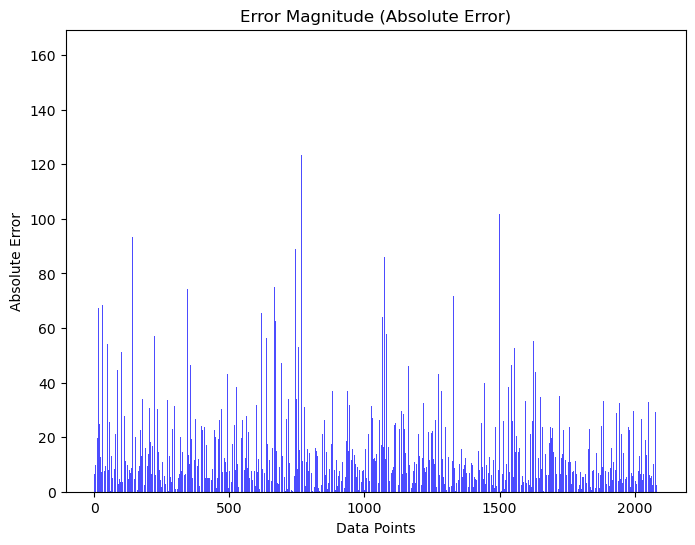

In [145]:
errors = np.abs(y_test - y_pred_test)  # Absolute errors
indices = np.arange(len(errors))

plt.figure(figsize=(8, 6))
plt.bar(indices, errors, color='blue', alpha=0.7)
plt.xlabel('Data Points')
plt.ylabel('Absolute Error')
plt.title('Error Magnitude (Absolute Error)')
plt.show()
